In [11]:
from __future__ import division, print_function
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
from fitlab.resman import RESMAN
from plotter import Plotter
from tools.tools import load_config
%matplotlib inline

In [12]:
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})

conf = load_config("../fitlab/inputs/upol_compass_zeta.py")
conf["resman"] = RESMAN(conf)
conf["resman"].get_residuals(conf["parman"].par)

x_bins = [0.003, 0.008, 0.013, 0.02, 0.032, 0.055, 0.1, 0.21, 0.4]
q2_bins = [1.0, 1.7, 3.0, 7.0, 16.0, 81.0]

raw = pd.read_excel('../database/sidis/expdata/5001.xlsx')

data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[data["hadron"] == "pi+"]

z_func = lambda z: [0.2, 0.3, 0.4, 0.6].index(z)
z_ids = tuple(range(4))

raw["qT"] = raw["pT"] / raw["z"]
data["qT"] = data["pT"] / data["z"]

raw["qT2"] = (raw["pT"] / raw["z"])**2
data["qT2"] = (data["pT"] / data["z"])**2

raw["pT2"] = (raw["pT"])**2
data["pT2"] = (data["pT"])**2


col_lab = "pT2"
sub_xlabel = r"$p_T^2$ (GeV$^2$)"

big_xlabel = "$x$"
big_ylabel = "$Q^2$"

title = "COMPASS"

sub_ylabel = r"$M_{D}^{\pi^+}$"

fig_kw = {"figsize": (13, 13)}


plotter = Plotter(raw=raw,
                  data=data,
                  col_lab=col_lab,
                  q2_bins=q2_bins,
                  x_bins=x_bins,
                  z_func=z_func,
                  z_ids=z_ids,
                  sub_xlabel=sub_xlabel,
                  sub_ylabel=sub_ylabel,
                  big_xlabel=big_xlabel,
                  big_ylabel=big_ylabel,
                  title=title,
                  fig_kw=fig_kw
                  )

plotter.z_labs = {
    0: r"$z = 0.2$",
    1: r"$z = 0.3$",
    2: r"$z = 0.4$",
    3: r"$z = 0.6$"
}

plotter.legend_kw["bbox_to_anchor"] = (1.0 / plotter.ncols, 1 - 1.0 / plotter.nrows)
plotter.legend_kw["loc"] = "center"

loading sidis data sets 5002
ogata N= 19


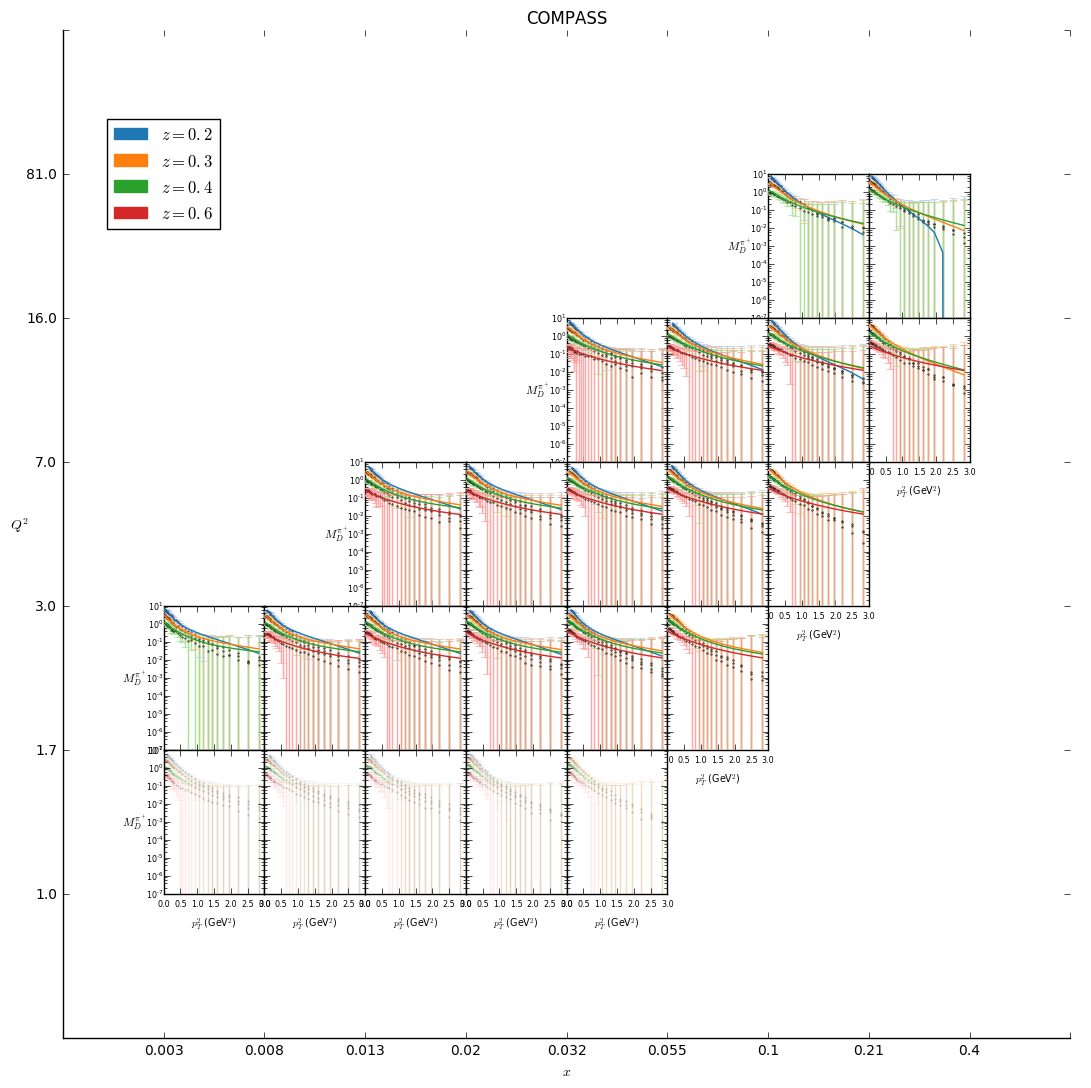

In [13]:
plotter.file_save="compass_zeta.pdf"
plotter.plot()

In [17]:
plotter.fig.savefig("compass_zeta.pdf")